In [1]:
#http://zzz.bwh.harvard.edu/plink/simulate.shtml

## Import packages and data

In [50]:
import numpy as np
import pandas as pd
import matplotlib

from matplotlib.colors import ListedColormap
from pandas_plink import read_plink1_bin
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 200

In [3]:
G_train = read_plink1_bin("Data/sim_ceu_train_top.bed", "Data/sim_ceu_train_top.bim", 
                    "Data/sim_ceu_train_top.fam", verbose=False)
print(G_train)

<xarray.DataArray 'genotype' (sample: 2800, variant: 25002)>
dask.array<transpose, shape=(2800, 25002), dtype=float64, chunksize=(1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * sample   (sample) object 'per0' 'per1' 'per2' ... 'per3998' 'per3999'
  * variant  (variant) object '1_neutral_D_191527' ... '22_neutral_D_47588'
    fid      (sample) <U7 'per0' 'per1' 'per2' ... 'per3996' 'per3998' 'per3999'
    iid      (sample) <U7 'per0' 'per1' 'per2' ... 'per3996' 'per3998' 'per3999'
    father   (sample) <U1 '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) <U1 '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    gender   (sample) <U1 '2' '2' '2' '2' '2' '2' ... '2' '2' '2' '2' '2' '2'
    trait    (sample) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0 1.0
    chrom    (variant) <U2 '1' '1' '1' '1' '1' '1' ... '22' '22' '22' '22' '22'
    snp      (variant) <U16 'neutral_D_191527' ... 'neutral_D_47588'
    cm       (variant) float64 0.0 0.0 0.0 0.0

In [4]:
y_train=np.array(G_train.trait)
print(y_train)
print(len(y_train))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==2]))

[2. 2. 2. ... 1. 1. 1.]
2800
1415
1385


In [5]:
X_train=np.array(G_train.values)

In [6]:
G_test = read_plink1_bin("Data/sim_ceu_test_top.bed", "Data/sim_ceu_test_top.bim", 
                    "Data/sim_ceu_test_top.fam", verbose=False)
y_test=np.array(G_test.trait)
print(len(y_test))
print(len(y_test[y_test==1]))
print(len(y_test[y_test==2]))
X_test=np.array(G_test.values)

1200
585
615


In [7]:
gwas=pd.read_table('Data/topSNPs.txt',header=None)
gwas.columns=['chr','snp','bp','A1','F_A','F_U','A2','CHISQ','P','OR','logp']
gwas['chr_snp']=gwas['chr'].map(str) + "_" + gwas['snp']
gwas=gwas.sort_values(by=['logp'], ascending=False)
gwas=gwas.reset_index()
gwas

,index,chr,snp,bp,A1,F_A,F_U,A2,CHISQ,P,OR,logp,chr_snp
0,25001,6,disease_he_15,9952975,C,0.16750,0.08657,T,82.930,8.511000e-20,2.1230,19.070019,6_disease_he_15
1,25000,16,disease_he_30,67967324,C,0.13900,0.07173,T,67.380,2.236000e-16,2.0890,15.650528,16_disease_he_30
2,24999,1,disease_he_41,234783582,C,0.16930,0.09576,T,66.040,4.420000e-16,1.9250,15.354578,1_disease_he_41
3,24998,16,disease_he_3,5594041,C,0.15780,0.08834,A,62.680,2.428000e-15,1.9330,14.614751,16_disease_he_3
4,24997,4,disease_he_17,152830399,G,0.10140,0.04664,A,61.540,4.336000e-15,2.3080,14.362911,4_disease_he_17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,1,3,neutral_B_57276,59157063,G,0.07545,0.06219,T,3.845,4.991000e-02,1.2310,1.301812,3_neutral_B_57276
24998,5,19,neutral_B_120957,52923460,T,0.07545,0.06219,C,3.845,4.991000e-02,1.2310,1.301812,19_neutral_B_120957
24999,6,22,neutral_B_4912,15849026,A,0.04693,0.05866,G,3.845,4.991000e-02,0.7903,1.301812,22_neutral_B_4912
25000,7,22,neutral_A_498329,31205871,G,0.04693,0.05866,A,3.845,4.991000e-02,0.7903,1.301812,22_neutral_A_498329


## Testing pipeline

In [8]:
snp_names=list(np.array(G_train.variant))
snp_keep=list(gwas.chr_snp[0:5])
print(snp_keep)
find = lambda searchList, elem: [[i for i, x in enumerate(searchList) if x == e] for e in elem]
find(snp_names,snp_keep)

['6_disease_he_15', '16_disease_he_30', '1_disease_he_41', '16_disease_he_3', '4_disease_he_17']


[[9231], [21350], [1871], [20924], [7190]]

In [9]:
from sklearn import base

class subsnp(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, n_snps, snp_assoc, snp_names):
        self.n_snps = n_snps
#         print(n_snps)
        self.snp_assoc = snp_assoc
        self.snp_names = snp_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Return an array with the selected SNPs as X
        find = lambda searchList, elem: [[i for i, x in enumerate(searchList) if x == e] for e in elem]
        snp_ids=list(self.snp_assoc.chr_snp[0:self.n_snps])
        snp_idx=find(self.snp_names,snp_ids)
        snp_idx=[y for x in snp_idx for y in x]
        X=X[:,snp_idx]
#         print(X.shape)
        return X

In [10]:
snp_names=list(np.array(G_train.variant))
snp_keep=list(gwas.chr_snp[0:5])
n_snps=10
subsnp_transform = subsnp(n_snps, gwas, snp_names)
t=subsnp_transform.fit_transform(X_train)
print(t)

[[1. 2. 2. ... 2. 2. 1.]
 [1. 2. 2. ... 2. 2. 2.]
 [2. 2. 1. ... 2. 2. 1.]
 ...
 [2. 1. 2. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 0. 2. ... 2. 2. 2.]]


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe_rfc = Pipeline([
        # ColumnSelectTransformer
    ('subsnp',subsnp(n_snps, gwas, snp_names)),
        # KNeighborsRegressor
    ('reg',RandomForestClassifier())
    ])
pipe_rfc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'subsnp', 'reg', 'subsnp__n_snps', 'subsnp__snp_assoc', 'subsnp__snp_names', 'reg__bootstrap', 'reg__class_weight', 'reg__criterion', 'reg__max_depth', 'reg__max_features', 'reg__max_leaf_nodes', 'reg__min_impurity_decrease', 'reg__min_impurity_split', 'reg__min_samples_leaf', 'reg__min_samples_split', 'reg__min_weight_fraction_leaf', 'reg__n_estimators', 'reg__n_jobs', 'reg__oob_score', 'reg__random_state', 'reg__verbose', 'reg__warm_start'])

In [12]:
pipe_rfc.fit(X_train, y_train)
print(pipe_rfc.score(X_train, y_train))
print(pipe_rfc.score(X_test, y_test))

0.7410714285714286
0.625


/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
pipe_rfc.set_params(subsnp__n_snps=100, reg__max_depth=100,reg__n_estimators=1000).fit(X_train, y_train)
pipe_rfc.fit(X_train, y_train)
print(pipe_rfc.score(X_train, y_train))
print(pipe_rfc.score(X_test, y_test))

1.0
0.7766666666666666


In [14]:
# Not needed because it's a simulation
# from sklearn.impute import SimpleImputer
# imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# print(SimpleImputer())
# imp_mf.fit(X_train)
# X_train=imp_mf.transform(X_train)
# imp_mf.fit(X_test)
# X_test=imp_mf.transform(X_test)

In [15]:
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(X_train)
# X_train=enc.transform(X_train).toarray()
# print(X_train.shape)
# X_test=enc.transform(X_test).toarray()
# print(X_test.shape)

In [16]:
# enc.get_feature_names()
# will need to map this back to the SNP names

## Random Forest Classifier

In [76]:
## Randomized search and random forest
# Number of SNPs
n_snps = [int(x) for x in np.linspace(20, 200, num = 10)]; n_snps.extend([int(x) for x in np.linspace(1000, 5000, num = 5)])
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 2)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 200, num = 10)]; 
max_depth.extend([int(x) for x in np.linspace(1000, 5000, num = 5)])
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 10, stop = 40, num = 4)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Create the random grid
random_grid = {'subsnp__n_snps': n_snps,
               'reg__n_estimators': n_estimators,
               'reg__max_depth': max_depth,
               'reg__min_samples_split': min_samples_split,
               'reg__min_samples_leaf': min_samples_leaf}
print(random_grid)

nb_par=1
for key, value in random_grid.items():
    nb_par*=len(value)
print(nb_par)

{'subsnp__n_snps': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 1000, 2000, 3000, 4000, 5000], 'reg__n_estimators': [1000, 2000], 'reg__max_depth': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 1000, 2000, 3000, 4000, 5000], 'reg__min_samples_split': [10, 20, 30, 40], 'reg__min_samples_leaf': [1, 2, 4, 8]}
7200


In [77]:
## Randomized search and random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

In [81]:
rfc_random = RandomizedSearchCV(estimator = pipe_rfc, 
                               param_distributions = random_grid, 
                               n_iter = 2000, 
                               cv = 5, 
                               n_jobs = 4, 
                               verbose=10)

# Fit the random search model
rfc_random.fit(X_train, y_train)
best_random = rfc_random.best_estimator_

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   39.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  7.9min
[Parallel(

In [83]:
#Predict the response for test dataset
print(rfc_random.best_params_)
y_pred = best_random.predict(X_test)
accuracy_rfc=metrics.accuracy_score(y_test, y_pred)
recall_rfc=recall_score(y_test, y_pred)
print("Accuracy:",round(accuracy_rfc,2),"Recall:",round(recall_rfc,2))

{'subsnp__n_snps': 5000, 'reg__n_estimators': 2000, 'reg__min_samples_split': 20, 'reg__min_samples_leaf': 2, 'reg__max_depth': 2000}
Accuracy: 0.74 Recall: 0.83


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[487  98]
 [220 395]]
              precision    recall  f1-score   support

         1.0       0.69      0.83      0.75       585
         2.0       0.80      0.64      0.71       615

    accuracy                           0.73      1200
   macro avg       0.75      0.74      0.73      1200
weighted avg       0.75      0.73      0.73      1200

0.735


In [85]:
#measure overfitting
y_train_pred = best_random.predict(X_train)
accuracy_train=metrics.accuracy_score(y_train, y_train_pred)
recall_train=recall_score(y_train, y_train_pred)
print("Train Accuracy:",round(accuracy_train,2),"Recall:",round(recall_train,2))

y_test_pred = best_random.predict(X_test)
accuracy_test=metrics.accuracy_score(y_test, y_test_pred)
recall_test=recall_score(y_test, y_test_pred)
print("Test Accuracy:",round(accuracy_test,2),"Recall:",round(recall_test,2))

Train Accuracy: 1.0 Recall: 1.0
Test Accuracy: 0.74 Recall: 0.83


In [86]:
#Saving model
#https://scikit-learn.org/stable/modules/model_persistence.html
import pickle
s = pickle.dumps(best_random)
from joblib import dump, load
dump(best_random, 'best_random_pipeline.joblib') 

['best_random_pipeline.joblib']

In [87]:
#loading model
from joblib import dump, load
best_random=load('best_random_pipeline.joblib') 

In [88]:
# feature importance
importances = best_random.named_steps["reg"].feature_importances_
#std = np.std([best_random.feature_importances_ for tree in best_random.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

In [89]:
gwas.chr_snp

0            6_disease_he_15
1           16_disease_he_30
2            1_disease_he_41
3            16_disease_he_3
4            4_disease_he_17
                ...         
24997      3_neutral_B_57276
24998    19_neutral_B_120957
24999      22_neutral_B_4912
25000    22_neutral_A_498329
25001     3_neutral_B_133767
Name: chr_snp, Length: 25002, dtype: object

In [90]:
indices[0:20]

array([ 2,  0,  3,  1,  8, 10,  9,  4,  7,  5, 12,  6, 16, 15, 17, 13, 18,
       14, 11, 19])

In [91]:
topX=np.array(gwas.chr_snp[indices[0:59]])
topX=pd.DataFrame([tmp.split('_') for tmp in topX],columns=['id','type','cat','variant'])
topX['snp']=gwas.chr_snp[indices[0:59]]
topX[0:5]

,id,type,cat,variant,snp
0,1,disease,he,41,6_disease_he_15
1,6,disease,he,15,16_disease_he_30
2,16,disease,he,3,1_disease_he_41
3,16,disease,he,30,16_disease_he_3
4,22,disease,he,20,4_disease_he_17


In [92]:
#Comparing with GWAS, looking at the top 59 variants (59 were considered significant in the GWAS)
topX.groupby(['type','cat'])['variant'].count()

type     cat
disease  he     46
         ho      5
neutral  B       1
         C       1
         D       6
Name: variant, dtype: int64

In [93]:
print("Feature ranking:")
for f in range(0,10):
    print("%d. %s (%f)" % (f + 1, topX.snp[indices[f]], importances[indices[f]]))

Feature ranking:
1. 1_disease_he_41 (0.003094)
2. 6_disease_he_15 (0.003016)
3. 16_disease_he_3 (0.002440)
4. 16_disease_he_30 (0.002405)
5. 22_disease_he_20 (0.002333)
6. 3_disease_he_25 (0.002170)
7. 5_disease_he_11 (0.002159)
8. 4_disease_he_17 (0.002145)
9. 3_disease_he_45 (0.001974)
10. 1_disease_he_32 (0.001935)


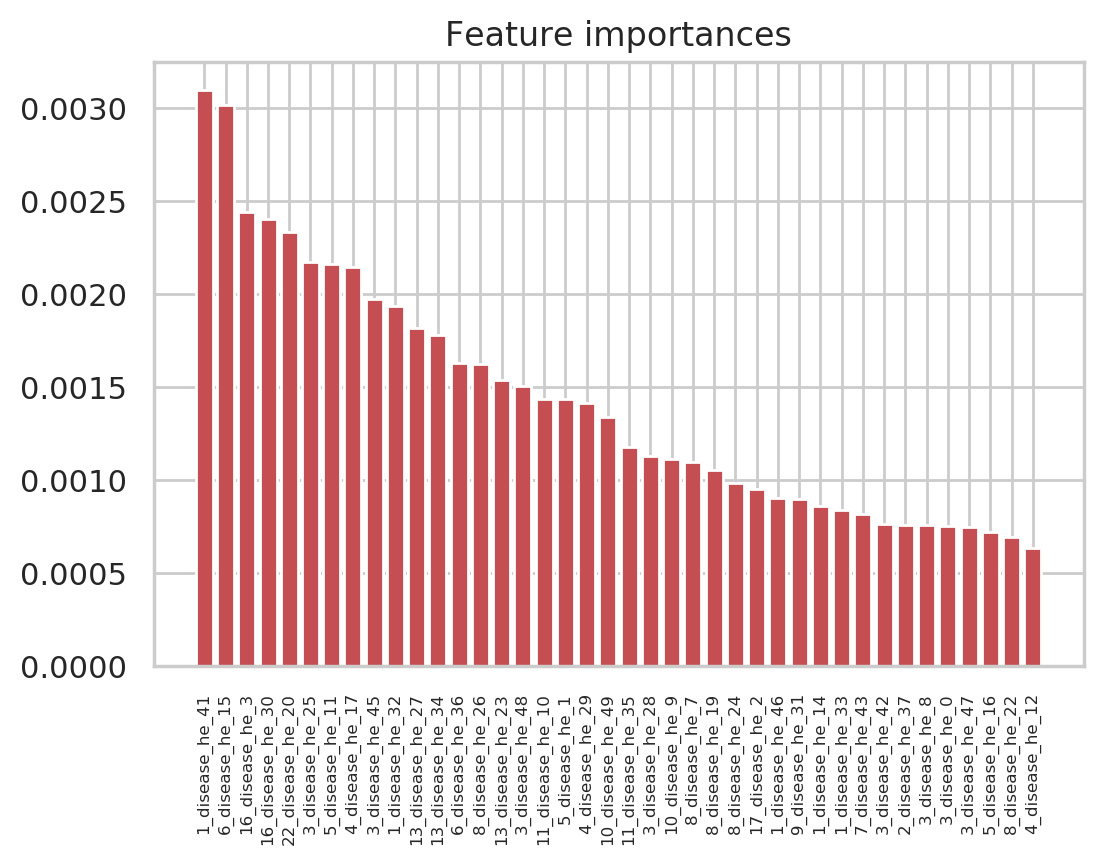

In [94]:
# Plot the feature importances of the forest
nb_feat=40
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,nb_feat), importances[indices[0:nb_feat]],
       color="r", align="center")
plt.xticks(rotation=90)
plt.xticks(range(0,nb_feat), topX.snp[indices[0:nb_feat]])
plt.tick_params(axis='x', which='major', labelsize=6) 
plt.show()

In [96]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_class = label_binarize(y_test, classes=[1,2])
y_pred_class = label_binarize(y_pred, classes=[1,2])
n_classes = y_test_class.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test_class, y_pred_class)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.73737752762143


In [34]:
#roc curve
#https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

## Global prediction 

Based on 1000 genome project

In [97]:
#Load 1000 genome dataset
kgp = read_plink1_bin("Data/1kG_top.bed", "Data/1kG_top.bim", "Data/1kG_top.fam", verbose=False)
print(kgp)

<xarray.DataArray 'genotype' (sample: 629, variant: 25002)>
dask.array<transpose, shape=(629, 25002), dtype=float64, chunksize=(629, 1024), chunktype=numpy.ndarray>
Coordinates:
  * sample   (sample) object 'HG00098' 'HG00100' ... 'NA20826' 'NA20828'
  * variant  (variant) object '1_rs10907177' '1_rs6604968' ... '22_rs2071421'
    fid      (sample) <U7 'HG00098' 'HG00100' 'HG00106' ... 'NA20826' 'NA20828'
    iid      (sample) <U7 'HG00098' 'HG00100' 'HG00106' ... 'NA20826' 'NA20828'
    father   (sample) <U1 '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) <U1 '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    gender   (sample) <U1 '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    trait    (sample) float64 -9.0 -9.0 -9.0 -9.0 -9.0 ... -9.0 -9.0 -9.0 -9.0
    chrom    (variant) <U2 '1' '1' '1' '1' '1' '1' ... '22' '22' '22' '22' '22'
    snp      (variant) <U10 'rs10907177' 'rs6604968' ... 'rs7410608' 'rs2071421'
    cm       (variant) float64 0.0 0.

In [98]:
X_kgp=np.array(kgp.values)
X_kgp.shape

(629, 25002)

In [37]:
# imp_mf.fit(X_kgp)
# X_kgp=imp_mf.transform(X_kgp)
# X_kgp=enc.transform(X_kgp).toarray()
# X_kgp.shape

In [99]:
# Imputing missing values as most frequent
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mf.fit(X_kgp)
print(SimpleImputer())
X_kgp=imp_mf.transform(X_kgp)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)


In [100]:
kpg_pred = best_random.predict(X_kgp)

In [101]:
print(kpg_pred[0:30])
print(len(kpg_pred))

[2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
629


In [102]:
import pandas as pd
kpg_df=pd.DataFrame(kpg_pred,columns=['Prediction'])
kpg_df['Prediction'].value_counts()

2.0    463
1.0    166
Name: Prediction, dtype: int64

In [103]:
igrs=pd.read_table('Data/igsr_samples.tsv') 
igrs = igrs[['Sample name','Sex','Population code','Superpopulation code','Population name']]

In [104]:
#get name of individuals from genetic dataset and combine with metadata
kgp_sample=pd.DataFrame(np.array(kgp.sample),columns=['Sample name'])
kpg_all=pd.merge(kgp_sample,igrs, on=['Sample name'])
kpg_all['Prediction']=kpg_pred
print(kpg_all.shape)

(629, 6)


In [105]:
kpg_all['Population code'].value_counts()

TSI    92
CEU    90
JPT    84
YRI    78
CHB    68
LWK    67
GBR    43
FIN    36
CHS    25
ASW    24
MXL    17
PUR     5
Name: Population code, dtype: int64

In [106]:
#Remove PUR because too few samples
kpg_all=kpg_all[kpg_all['Population code']!='PUR']

In [107]:
kpg_groupcode=pd.DataFrame(kpg_all.groupby(['Population code','Prediction'], as_index=False).count())
kpg_groupcode=kpg_groupcode[['Population code','Prediction','Sample name']]
#getting pop names related to codes
code_desc=pd.DataFrame({'Population code': ['TSI','CEU','JPT','YRI','CHB','LWK','GBR','FIN','CHS','ASW','MXL'],
                        'Population': ['Toscani','CEPH','Japanese','Yoruba','Han Chinese','Luhya','British','Finnish',
        'Southern Han Chinese','African Ancestry SW','Mexican Ancestry']})

kpg_groupcode2=pd.merge(kpg_groupcode,code_desc, on=['Population code'],how='left')
kpg_groupcode2.loc[kpg_groupcode2.Prediction == 1, 'Prediction'] = "Unaffected"
kpg_groupcode2.loc[kpg_groupcode2.Prediction == 2, 'Prediction'] = "Affected"

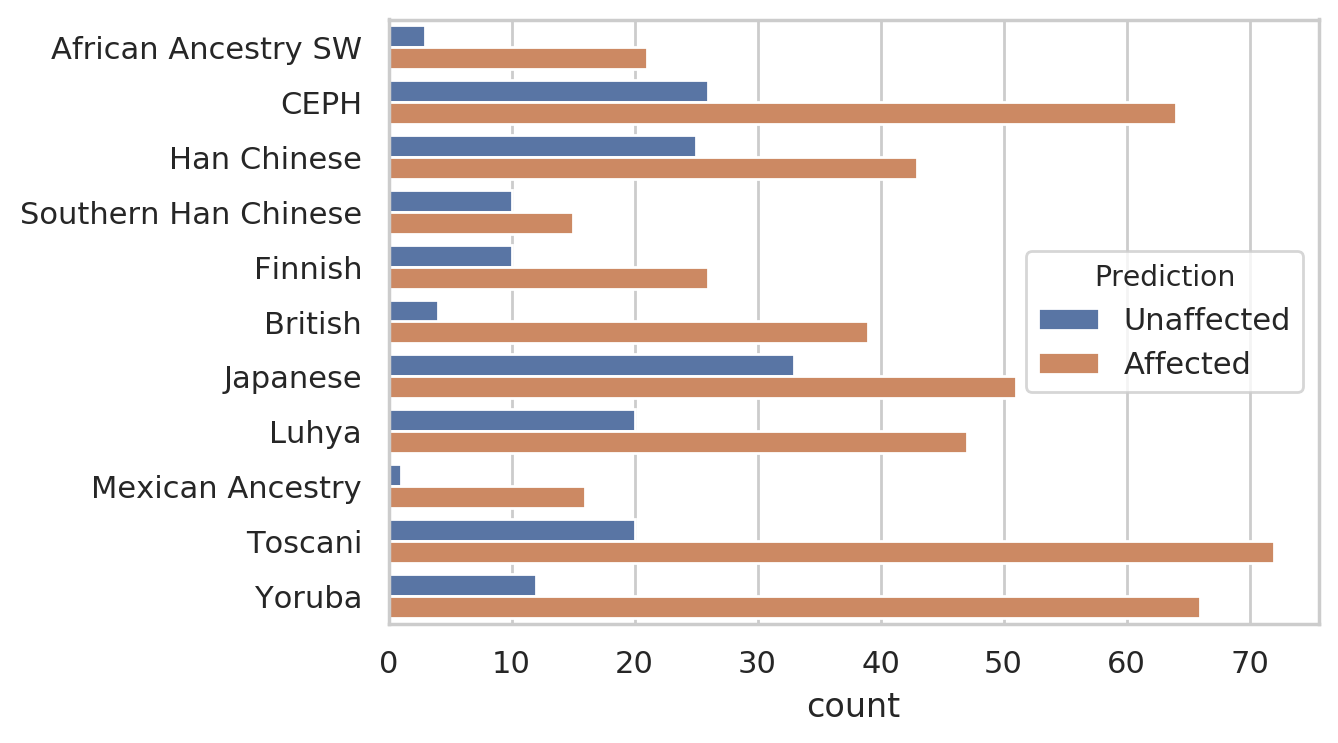

In [108]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="Population", x="Sample name", hue="Prediction", data=kpg_groupcode2)
ax.set_xlabel('count');
ax.set_ylabel('');

## Gradient Boosting Classifier

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
pipe_gbc = Pipeline([
        # ColumnSelectTransformer
    ('subsnp',subsnp(n_snps, gwas, snp_names)),
        # KNeighborsRegressor
    ('reg',GradientBoostingClassifier())
    ])
pipe_gbc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'subsnp', 'reg', 'subsnp__n_snps', 'subsnp__snp_assoc', 'subsnp__snp_names', 'reg__criterion', 'reg__init', 'reg__learning_rate', 'reg__loss', 'reg__max_depth', 'reg__max_features', 'reg__max_leaf_nodes', 'reg__min_impurity_decrease', 'reg__min_impurity_split', 'reg__min_samples_leaf', 'reg__min_samples_split', 'reg__min_weight_fraction_leaf', 'reg__n_estimators', 'reg__n_iter_no_change', 'reg__presort', 'reg__random_state', 'reg__subsample', 'reg__tol', 'reg__validation_fraction', 'reg__verbose', 'reg__warm_start'])

In [57]:
# Create the random grid
# Number of SNPs
n_snps = [int(x) for x in np.linspace(20, 200, num = 10)]; n_snps.extend([int(x) for x in np.linspace(500, 5000, num = 10)])
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 200, num = 10)]; max_depth.extend([int(x) for x in np.linspace(500, 5000, num = 10)])
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid_gbc = {'subsnp__n_snps': n_snps,
               'reg__n_estimators': n_estimators,
               'reg__max_depth': max_depth,
               'reg__learning_rate': np.arange(0.1,2,0.1),
               'reg__subsample': np.arange(0.1,1,0.1)}
print(random_grid_gbc)

{'subsnp__n_snps': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], 'reg__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'reg__max_depth': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], 'reg__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]), 'reg__subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_random = RandomizedSearchCV(estimator = pipe_gbc, 
                               param_distributions = random_grid_gbc, 
                               n_iter = 200, 
                               cv = 3, 
                               verbose=10,  
                               n_jobs = 4)

# Fit the random search model
gbc_random.fit(X_train, y_train)
print(gbc_random.best_params_)
best_gbc_random = gbc_random.best_estimator_
#Predict the response for test dataset
y_pred = best_gbc_random.predict(X_test)
print(gbc_random.score(X_test, y_test))
accuracy2=metrics.accuracy_score(y_test, y_pred)
recall2=recall_score(y_test, y_pred)
print("Accuracy:",round(accuracy2,2),"Recall:",round(recall2,2))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 10.6min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 12.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 24.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 34.8min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 37.6min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 53.7min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 66.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 74.7min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 78.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 99.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 112.6min
[Parallel

{'subsnp__n_snps': 2000, 'reg__subsample': 0.30000000000000004, 'reg__n_estimators': 900, 'reg__max_depth': 1000, 'reg__learning_rate': 0.1}
0.6458333333333334
Accuracy: 0.65 Recall: 0.68


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[395 190]
 [235 380]]
              precision    recall  f1-score   support

         1.0       0.63      0.68      0.65       585
         2.0       0.67      0.62      0.64       615

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200

0.6458333333333334


In [63]:
#measure overfitting
y_train_pred = best_gbc_random.predict(X_train)
accuracy_train=metrics.accuracy_score(y_train, y_train_pred)
recall_train=recall_score(y_train, y_train_pred)
print("Train Accuracy:",round(accuracy_train,2),"Recall:",round(recall_train,2))

y_test_pred = best_gbc_random.predict(X_test)
accuracy_test=metrics.accuracy_score(y_test, y_test_pred)
recall_test=recall_score(y_test, y_test_pred)
print("Test Accuracy:",round(accuracy_test,2),"Recall:",round(recall_test,2))

Train Accuracy: 1.0 Recall: 1.0
Test Accuracy: 0.65 Recall: 0.68
